#Installation and Importing

In [ ]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 4.6 MB/s 
     |████████████████████████████████| 18.0 MB 242 kB/s 
     |████████████████████████████████| 240 kB 74.7 MB/s 
     |████████████████████████████████| 112 kB 72.3 MB/s 
     |████████████████████████████████| 54 kB 2.2 MB/s 
     |████████████████████████████████| 943 kB 56.2 MB/s 
     |████████████████████████████████| 37.5 MB 1.3 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 1.6 MB 50.2 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 4.1 MB 31.7 MB/s 
     |████████████████████████████████| 112 kB 69.6 MB/s 
  Created wheel for qiskit: filename=qiskit-0.37.1-py3-none-any.whl size=12067 sha256=ca4f425228fc5e2298534d3d5887aecdeffda54a4116485edb56dd780bab2f89
  Stored in directory: /root/.cache/pip/wheels/1c/3c/a3/bf8c2

In [ ]:
!pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 8.1 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=50b777bbcd54ecf29dbce23a24a23fd1ca233ce0459f889f0ea4d0b66dcd0dcf
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [ ]:
from qiskit import*
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram,plot_bloch_multivector,array_to_latex

In [ ]:
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Shor
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
print("Imports Successful")

Imports Successful


#Classical

In [ ]:
N=7*11
a=2

In [ ]:
import math
math.gcd(a,N)

1

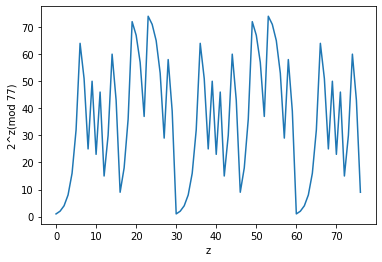

In [ ]:
import matplotlib.pyplot as plotter 

z= list(range(N))
y= [a**z0 % N for z0 in z]

plotter.plot(z,y)
plotter.xlabel('z')
plotter.ylabel(f'{a}^z(mod {N})')
plotter.show()

In [ ]:
r= z[y[1:].index(1)+1]
print(f'r = {r}')

r = 30


In [ ]:
if r % 2 == 0:
    x = (a**(r/2.)) % N
    print(f'x = {x}')
    if((x+1) % N !=0):
        print(math.gcd((int(x)+1), N),math.gcd((int(x)-1), N))
    else:
            print("x+1 is 0(mod N)")
else:
    print(f'r = {r} is odd')

x = 43.0
11 7


# Qiskit Implimentation 

In [ ]:
def c_amod(a,power):
    U =  QuantumCircuit(4)
    for iteration in range(power):
        U.swap(2,3)
        U.swap(1,2)
        U.swap(0,1)
        for q in range(4):
            U.x(q)
    U=U.to_gate()
    U.name='%i^%i mod ' %(a,power)
    c_U = U.control()
    return c_U

In [ ]:
n_count= 10
a=9

In [ ]:
def qft_dagger(n):
   
    qc = QuantumCircuit(n)
    
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT dagger"
    return qc

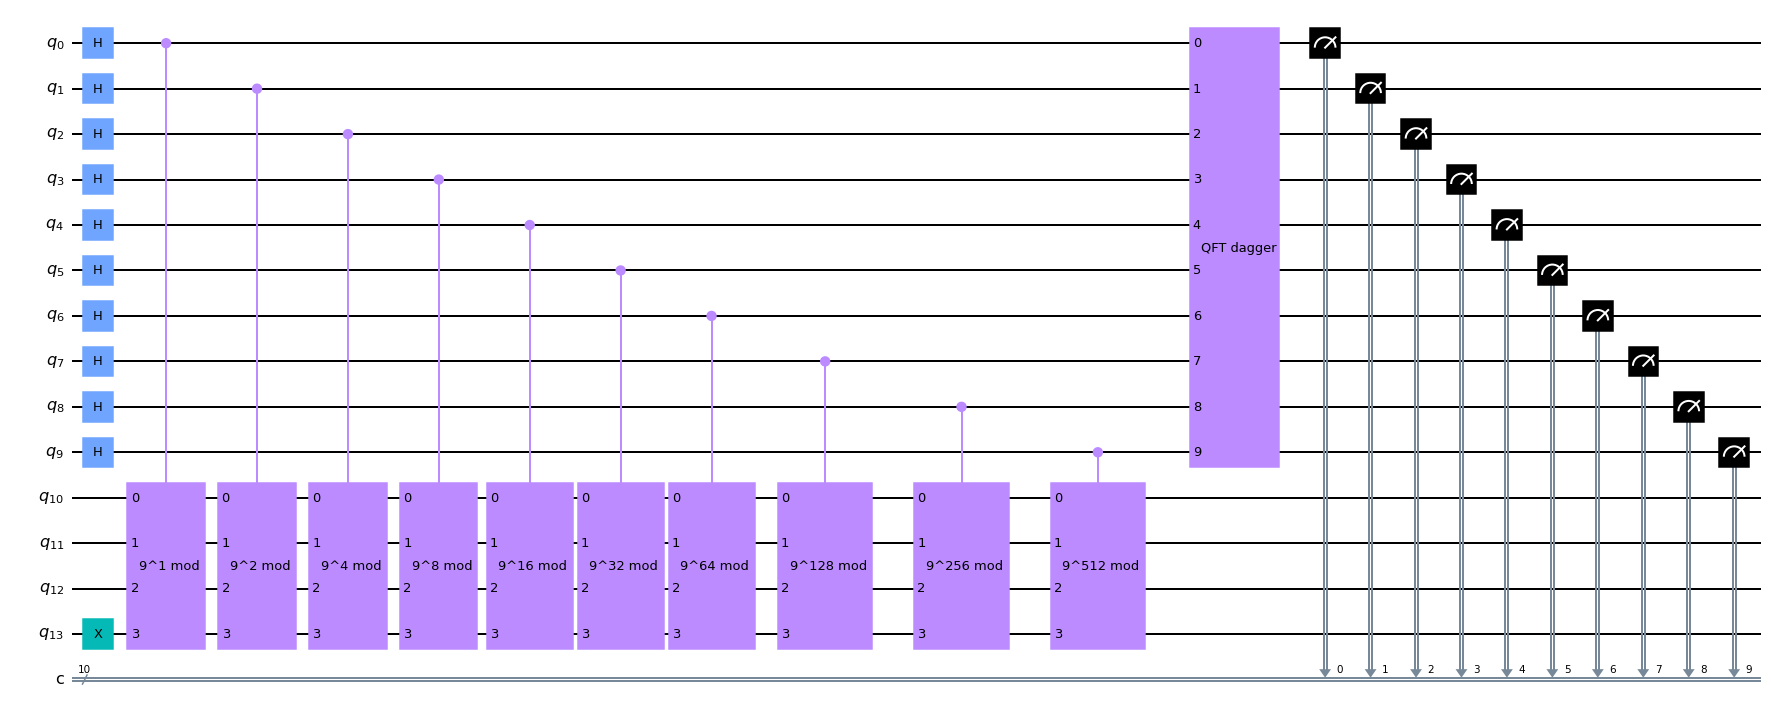

In [ ]:
qc = QuantumCircuit(n_count + 4, n_count)

for q in range(n_count):
    qc.h(q)
    
qc.x(3+n_count)

for q in range(n_count):
    qc.append(c_amod(a, 2**q), 
             [q] + [i+n_count for i in range(4)])

qc.append(qft_dagger(n_count), range(n_count))


qc.measure(range(n_count), range(n_count))
qc.draw(fold=-1,output='mpl') 

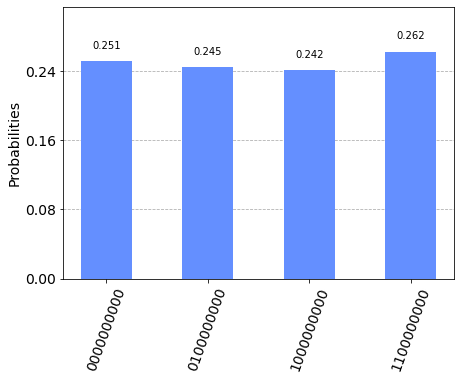

In [ ]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend,shots=2048).result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

              Register Output            Phase
0  0100000000(bin) = 256(dec)  256/1024 = 0.25
1  1100000000(bin) = 768(dec)  768/1024 = 0.75
2  1000000000(bin) = 512(dec)  512/1024 = 0.50
3  0000000000(bin) =   0(dec)    0/1024 = 0.00


In [ ]:
Fraction(0.666)

Fraction(5998794703657501, 9007199254740992)

In [ ]:
# Get fraction that most closely resembles 0.666
# with denominator < 15
Fraction(0.666).limit_denominator(15)

Fraction(2, 3)

In [ ]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.25      1/4            4
1   0.75      3/4            4
2   0.50      1/2            2
3   0.00      0/1            1


In [ ]:
def a2jmodN(a, j, N):
    """Compute a^{2^j} (mod N) by repeated squaring"""
    for i in range(j):
        a = np.mod(a**2, N)
    return a

In [ ]:
a2jmodN(7, 2049, 53)

47

In [ ]:
N = 15

In [ ]:
np.random.seed(1) # This is to make sure we get reproduceable results
a = randint(2, 15)
print(a)

7


In [ ]:
from math import gcd # greatest common divisor
gcd(a, N)

1

In [ ]:
def qpe_amod15(a):
    n_count = 8
    qc = QuantumCircuit(4+n_count, n_count)
    for q in range(n_count):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(3+n_count) # And auxiliary register in state |1>
    for q in range(n_count): # Do controlled-U operations
        qc.append(c_amod(a, 2**q), 
                 [q] + [i+n_count for i in range(4)])
    qc.append(qft_dagger(n_count), range(n_count)) # Do inverse-QFT
    qc.measure(range(n_count), range(n_count))
    # Simulate Results
    aer_sim = Aer.get_backend('aer_simulator')
    # Setting memory=True below allows us to see a list of each sequential reading
    t_qc = transpile(qc, aer_sim)
    qobj = assemble(t_qc, shots=1)
    result = aer_sim.run(qobj, memory=True).result()
    readings = result.get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**n_count)
    print("Corresponding Phase: %f" % phase)
    return phase

In [ ]:
phase = qpe_amod15(a) # Phase = s/r
Fraction(phase).limit_denominator(15) # Denominator should (hopefully!) tell us r

Register Reading: 10000000
Corresponding Phase: 0.500000


Fraction(1, 2)

In [ ]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

2


In [ ]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[3, 1]


In [ ]:
a = 7
factor_found = False
attempt = 0
while not factor_found:
    attempt += 1
    print("\nAttempt %i:" % attempt)
    phase = qpe_amod15(a) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N) # Denominator should (hopefully!) tell us r
    r = frac.denominator
    print("Result: r = %i" % r)
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                print("*** Non-trivial factor found: %i ***" % guess)
                factor_found = True


Attempt 1:
Register Reading: 01000000
Corresponding Phase: 0.250000
Result: r = 4
Guessed Factors: 3 and 5
*** Non-trivial factor found: 3 ***
*** Non-trivial factor found: 5 ***
